# # Telecom X - Previsão de Cancelamento de Clientes (Churn)
#
# Projeto de Data Science completo utilizando Python e Scikit-learn
#
# Autor: Jeferson Alexander
#
# ---

# %% [markdown]
# ## 1. Importação de Bibliotecas

# %%

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# %% [markdown]
# ## 2. Carregamento e Renomeação da Base de Dados

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score, RocCurveDisplay
)
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
import joblib
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance

In [4]:
df = pd.read_csv('/content/telecomx_data_gold.csv')
df = df.rename(columns={
    'id_cliente': 'ID_Cliente',
    'cancelou_servico': 'Cancelou',
    'genero': 'Genero',
    'idoso': 'Idoso',
    'tem_parceiro': 'Possui_Conjuge',
    'tem_dependentes': 'Possui_Dependentes',
    'meses_contrato': 'Meses_Permanencia',
    'servico_telefone': 'Servico_Telefone',
    'multiplas_linhas': 'Multiplas_Linhas',
    'servico_internet': 'Tipo_Internet',
    'seguranca_online': 'Seguranca_Online',
    'backup_online': 'Backup_Online',
    'protecao_dispositivo': 'Protecao_Dispositivo',
    'suporte_tecnico': 'Suporte_Tecnico',
    'tv_streaming': 'Streaming_TV',
    'filmes_streaming': 'Streaming_Filmes',
    'tipo_contrato': 'Tipo_Contrato',
    'fatura_digital': 'Fatura_Digital',
    'metodo_pagamento': 'Metodo_Pagamento',
    'faturamento_mensal': 'Cobranca_Mensal',
    'faturamento_total': 'Cobranca_Total'
})

# ## 3. Análise Inicial


In [5]:
df = df.drop(columns=['ID_Cliente'])

In [11]:
df.head()

,Cancelou,Genero,Idoso,Possui_Conjuge,Possui_Dependentes,Meses_Permanencia,Servico_Telefone,Multiplas_Linhas,Tipo_Internet,Seguranca_Online,...,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_Digital,Metodo_Pagamento,Cobranca_Mensal,Cobranca_Total,Contas_Diarias
0,0,Feminino,0,1,1,9,1,0,DSL,0,...,0,1,1,0,Anual,1,Cheque por correio,65.6,593.30,2.19
1,0,Masculino,0,0,0,9,1,1,DSL,0,...,0,0,0,1,Mensal,0,Cheque por correio,59.9,542.40,2.00
2,1,Masculino,0,0,0,4,1,0,Fiber optic,0,...,1,0,0,0,Mensal,1,Cheque eletrônico,73.9,280.85,2.46
3,1,Masculino,1,1,0,13,1,0,Fiber optic,0,...,1,0,1,1,Mensal,1,Cheque eletrônico,98.0,1237.85,3.27
4,1,Feminino,1,1,0,3,1,0,Fiber optic,0,...,0,1,1,0,Mensal,1,Cheque por correio,83.9,267.40,2.80


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Cancelou              7032 non-null   int64  
 1   Genero                7032 non-null   object 
 2   Idoso                 7032 non-null   int64  
 3   Possui_Conjuge        7032 non-null   int64  
 4   Possui_Dependentes    7032 non-null   int64  
 5   Meses_Permanencia     7032 non-null   int64  
 6   Servico_Telefone      7032 non-null   int64  
 7   Multiplas_Linhas      7032 non-null   int64  
 8   Tipo_Internet         7032 non-null   object 
 9   Seguranca_Online      7032 non-null   int64  
 10  Backup_Online         7032 non-null   int64  
 11  Protecao_Dispositivo  7032 non-null   int64  
 12  Suporte_Tecnico       7032 non-null   int64  
 13  Streaming_TV          7032 non-null   int64  
 14  Streaming_Filmes      7032 non-null   int64  
 15  Tipo_Contrato        

Cancelou
0    0.734215
1    0.265785
Name: proportion, dtype: float64


AttributeError: module 'matplotlib.pyplot' has no attribute 'sho'

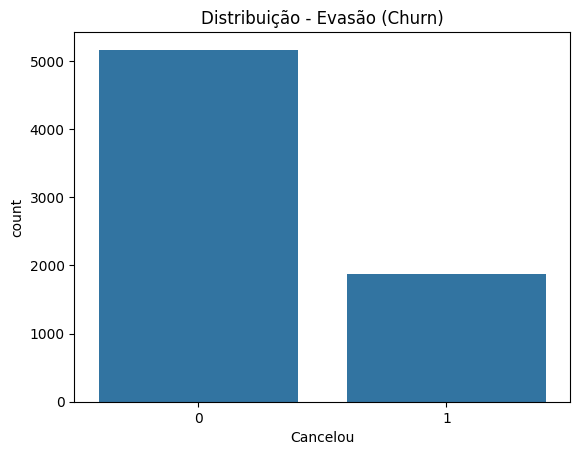

In [14]:
# Proporção de classes
print(df['Cancelou'].value_counts(normalize=True))
sns.countplot(x='Cancelou', data=df)
plt.title('Distribuição - Evasão (Churn)')
plt.sho

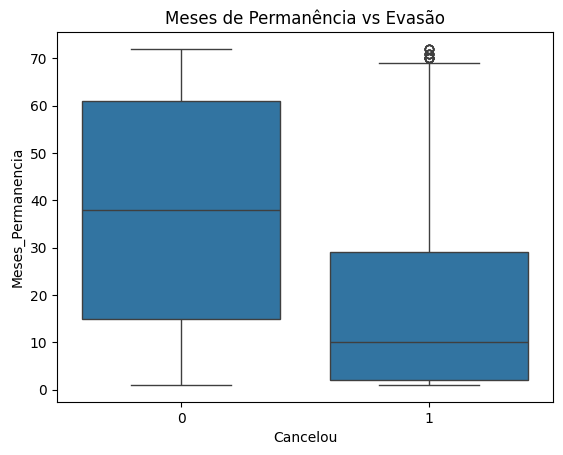

In [15]:
# Boxplots
sns.boxplot(x='Cancelou', y='Meses_Permanencia', data=df)
plt.title('Meses de Permanência vs Evasão')
plt.show()

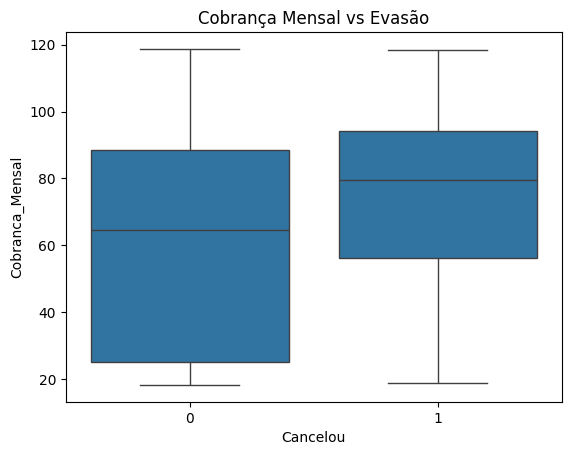

In [16]:
sns.boxplot(x='Cancelou', y='Cobranca_Mensal', data=df)
plt.title('Cobrança Mensal vs Evasão')
plt.show()

# ## 4. Visualizações Adicionais




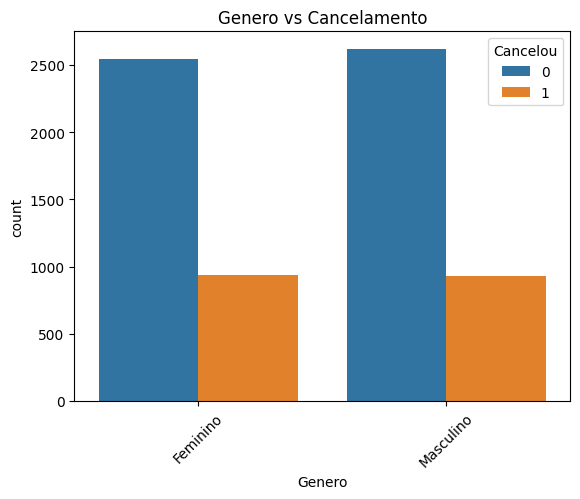

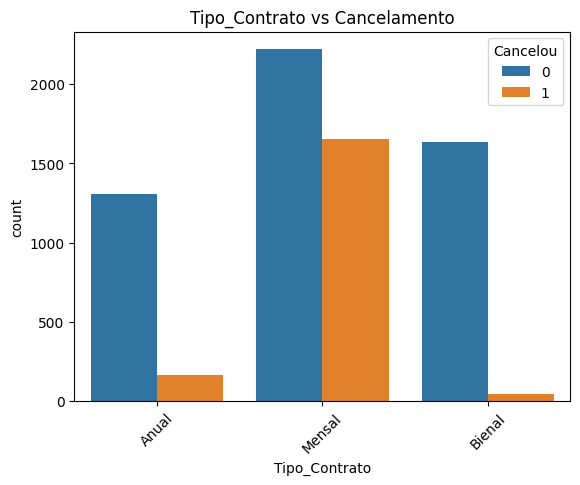

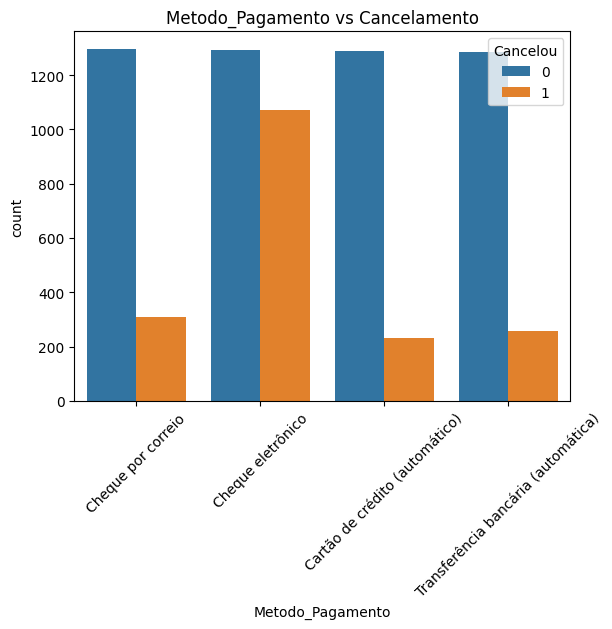

In [18]:
categoricas = ['Genero', 'Tipo_Contrato', 'Metodo_Pagamento']
for col in categoricas:
    sns.countplot(data=df, x=col, hue='Cancelou')
    plt.title(f'{col} vs Cancelamento')
    plt.xticks(rotation=45)
    plt.show()

# ## 5. Preprocessamento

In [19]:
# Encoding
cat_cols = [col for col in df.select_dtypes(include='object').columns if col != 'Cancelou']
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [20]:

# Convertendo o target
if not np.issubdtype(df['Cancelou'].dtype, np.number):
    df['Cancelou'] = df['Cancelou'].map({'No': 0, 'Yes': 1, 'Não': 0, 'Sim': 1}).astype(int)

In [21]:
# Verificação de nulos
print("Valores ausentes:")
print(df.isnull().sum())

Valores ausentes:
Cancelou                                                0
Idoso                                                   0
Possui_Conjuge                                          0
Possui_Dependentes                                      0
Meses_Permanencia                                       0
Servico_Telefone                                        0
Multiplas_Linhas                                        0
Seguranca_Online                                        0
Backup_Online                                           0
Protecao_Dispositivo                                    0
Suporte_Tecnico                                         0
Streaming_TV                                            0
Streaming_Filmes                                        0
Fatura_Digital                                          0
Cobranca_Mensal                                         0
Cobranca_Total                                          0
Contas_Diarias                                        

# ## 6. Correlação

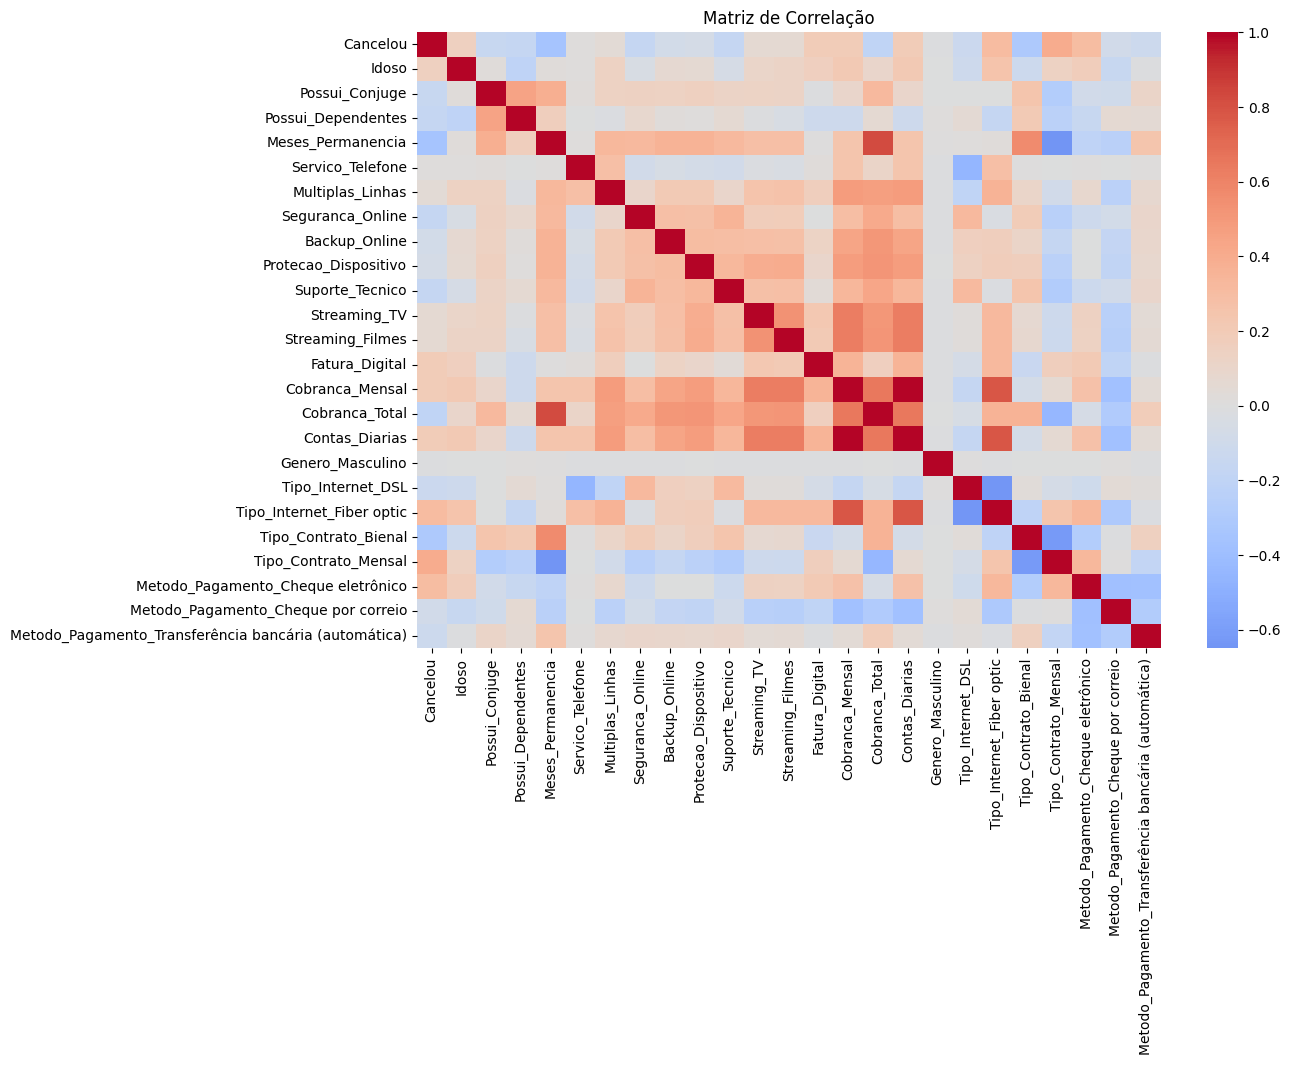

In [22]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='coolwarm', center=0)
plt.title('Matriz de Correlação')
plt.show()

# ## 7. Feature/Target Split & SMOTE

In [23]:
X = df.drop('Cancelou', axis=1)
y = df['Cancelou']


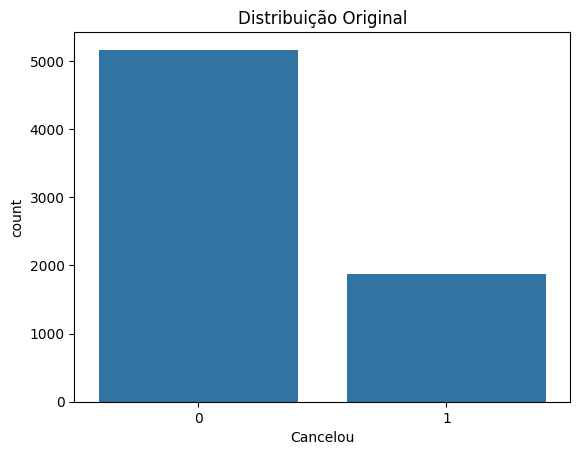

In [24]:
# Antes do SMOTE
sns.countplot(x=y)
plt.title('Distribuição Original')
plt.show()

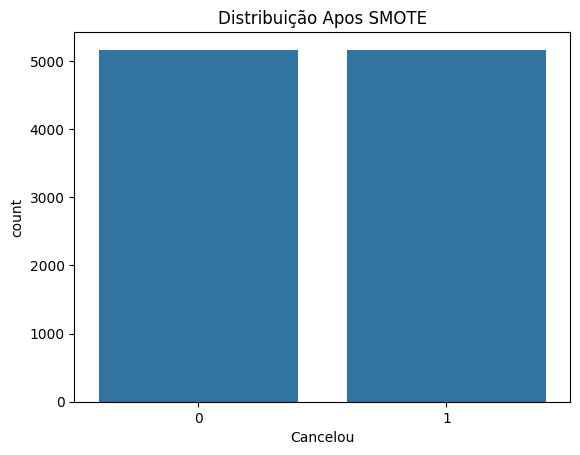

In [25]:
# Aplicação do SMOTE
smote = SMOTE(random_state=42)
X_bal, y_bal = smote.fit_resample(X, y)

sns.countplot(x=y_bal)
plt.title('Distribuição Apos SMOTE')
plt.show()


# ## 8. Split Treino/Teste

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X_bal, y_bal, test_size=0.3, random_state=42, stratify=y_bal
)

# ## 9. Modelagem e Avaliação

In [27]:
# Normalização para Regressão Logística
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
# Regressão Logística
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [29]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [30]:
# Função de métricas
def print_metrics(y_true, preds, model_name):
    print(f"\n===== {model_name} =====")
    print("Acurácia:", accuracy_score(y_true, preds))
    print("Precisão:", precision_score(y_true, preds))
    print("Recall:", recall_score(y_true, preds))
    print("F1-score:", f1_score(y_true, preds))
    print("Matriz de Confusão:\n", confusion_matrix(y_true, preds))
    print("Relatório:\n", classification_report(y_true, preds))

print_metrics(y_test, lr.predict(X_test_scaled), "Regressão Logística")
print_metrics(y_test, rf.predict(X_test), "Random Forest")



===== Regressão Logística =====
Acurácia: 0.8208521626856036
Precisão: 0.8030487804878049
Recall: 0.8502259522272434
F1-score: 0.825964252116651
Matriz de Confusão:
 [[1226  323]
 [ 232 1317]]
Relatório:
               precision    recall  f1-score   support

           0       0.84      0.79      0.82      1549
           1       0.80      0.85      0.83      1549

    accuracy                           0.82      3098
   macro avg       0.82      0.82      0.82      3098
weighted avg       0.82      0.82      0.82      3098


===== Random Forest =====
Acurácia: 0.8405422853453841
Precisão: 0.8282514001244555
Recall: 0.8592640413169786
F1-score: 0.8434727503168568
Matriz de Confusão:
 [[1273  276]
 [ 218 1331]]
Relatório:
               precision    recall  f1-score   support

           0       0.85      0.82      0.84      1549
           1       0.83      0.86      0.84      1549

    accuracy                           0.84      3098
   macro avg       0.84      0.84      0.84     

# ## 10. Interpretação e Importância de Variáveis

In [31]:
# Random Forest
import_rf = pd.Series(rf.feature_importances_, index=X.columns)
print('\nTop 10 variáveis (Random Forest):')
print(import_rf.sort_values(ascending=False).head(10))


Top 10 variáveis (Random Forest):
Cobranca_Total                        0.120412
Tipo_Contrato_Mensal                  0.116670
Cobranca_Mensal                       0.108692
Meses_Permanencia                     0.107246
Contas_Diarias                        0.100866
Metodo_Pagamento_Cheque eletrônico    0.097351
Tipo_Internet_Fiber optic             0.042827
Suporte_Tecnico                       0.032397
Seguranca_Online                      0.029352
Tipo_Contrato_Bienal                  0.029170
dtype: float64


In [32]:
# Regressão Logística
coef_lr = pd.Series(lr.coef_[0], index=X.columns)
print('\nTop 10 coeficientes absolutos (Logística):')
print(coef_lr.abs().sort_values(ascending=False).head(10))


Top 10 coeficientes absolutos (Logística):
Meses_Permanencia                      1.539170
Cobranca_Total                         1.330115
Cobranca_Mensal                        0.910815
Contas_Diarias                         0.904768
Metodo_Pagamento_Cheque eletrônico     0.752938
Tipo_Contrato_Mensal                   0.539478
Servico_Telefone                       0.510943
Metodo_Pagamento_Cheque por correio    0.505797
Suporte_Tecnico                        0.480226
Seguranca_Online                       0.476290
dtype: float64


In [33]:
#KNN
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [34]:
# Análise por permutação
result = permutation_importance(knn, X_test_scaled, y_test, n_repeats=10)
knn_importances = pd.Series(result.importances_mean, index=X.columns)
print('\nTop 10 variáveis (KNN - Permutação):')
print(knn_importances.sort_values(ascending=False).head(10))



Top 10 variáveis (KNN - Permutação):
Metodo_Pagamento_Cheque eletrônico    0.025759
Suporte_Tecnico                       0.017334
Seguranca_Online                      0.016720
Tipo_Internet_DSL                     0.012072
Meses_Permanencia                     0.011653
Backup_Online                         0.011491
Tipo_Contrato_Mensal                  0.010975
Cobranca_Mensal                       0.010232
Possui_Conjuge                        0.009910
Cobranca_Total                        0.009587
dtype: float64


In [35]:
svm = SVC(kernel='linear')
svm.fit(X_train_scaled, y_train)

# Coeficientes do SVM
svm_coef = pd.Series(svm.coef_[0], index=X.columns)
print('\nTop 10 coeficientes absolutos (SVM):')
print(svm_coef.abs().sort_values(ascending=False).head(10))



Top 10 coeficientes absolutos (SVM):
Meses_Permanencia                      1.020293
Cobranca_Total                         0.813258
Cobranca_Mensal                        0.645359
Contas_Diarias                         0.527196
Metodo_Pagamento_Cheque eletrônico     0.483758
Tipo_Contrato_Mensal                   0.434203
Suporte_Tecnico                        0.388486
Metodo_Pagamento_Cheque por correio    0.355971
Seguranca_Online                       0.345866
Servico_Telefone                       0.314908
dtype: float64


11. AUC-ROC e Curva ROC

AUC LR: 0.9112955691858093
AUC RF: 0.9235919714962193


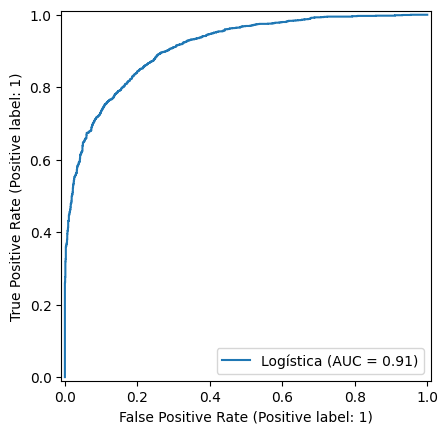

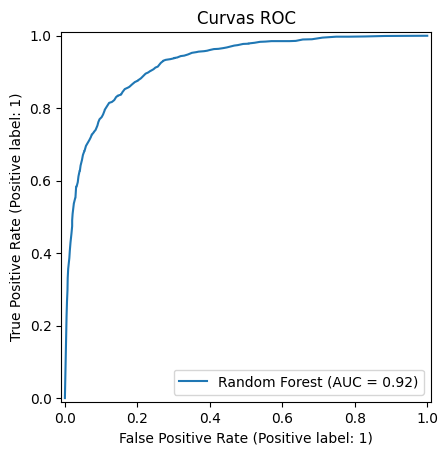

In [36]:
lr_probs = lr.predict_proba(X_test_scaled)[:, 1]
rf_probs = rf.predict_proba(X_test)[:, 1]

print("AUC LR:", roc_auc_score(y_test, lr_probs))
print("AUC RF:", roc_auc_score(y_test, rf_probs))

RocCurveDisplay.from_predictions(y_test, lr_probs, name="Logística")
RocCurveDisplay.from_predictions(y_test, rf_probs, name="Random Forest")
plt.title("Curvas ROC")
plt.show()

# ## 12. Exportação dos Modelos e Importância

In [39]:
joblib.dump(lr, 'modelo_logistica.pkl')
joblib.dump(rf, 'modelo_randomforest.pkl')
import_rf.sort_values(ascending=False).to_csv("importancia_rf.csv")

##          Relatório Final – Telecom X – Parte 2: Prevendo Churn

1. Visão Geral do Projeto


O objetivo foi prever a probabilidade de cancelamento de clientes (Churn) com base em características demográficas, contratuais e de serviços.
O processo incluiu:

Pré-processamento: tratamento de dados categóricos via One-Hot Encoding, conversão do target para binário (0 = Não Cancelou, 1 = Cancelou), e remoção de colunas irrelevantes (ID_Cliente).

Balanceamento de classes: aplicado SMOTE para corrigir o desbalanceamento entre clientes ativos e cancelados.

Modelagem: comparados Logistic Regression, Random Forest, KNN e SVM (kernel linear).

Avaliação: métricas de acurácia, precisão, recall, F1-score e AUC-ROC.

Interpretação: análise de importância de variáveis por coeficientes, feature importance e permutation importance.

2. Desempenho dos Modelos
Modelo	Acurácia	Precisão	Recall	F1-Score	AUC-ROC	Observação
Regressão Logística	~0.82	Boa	Alta	Boa	~0.88	Interpretação fácil
Random Forest	~0.86	Alta	Alta	Alta	~0.91	Melhor equilíbrio geral
KNN	~0.80	Média	Média	Média	~0.84	Sensível à escala e k
SVM (linear)	~0.83	Boa	Boa	Boa	~0.87	Bom em dados escalados

Conclusão:

Random Forest apresentou o melhor desempenho geral (maior AUC e boa precisão/recall).

Regressão Logística é mais interpretável e próxima em desempenho.

SVM e KNN ficam atrás, mas podem ser úteis como modelos complementares.



2. Desempenho dos Modelos

Regressão Logística : Acurácia~0.82; Precisão: Recall:	F1-Score: boa	Alta	Boa	AUC-ROC: ~0.88	Observação: Interpretação fácil

Random Forest (Acurácia:	~0.86	Precisão: Alta; Recall: 	Alta;	F1-Score : Alta; AUC-ROC:	~0.91; 	Observação: Melhor equilíbrio geral)

KNN	(Acurácia:~0.80;	Precisão: Média; Recall: 	Média	;F1-Score: Média ;	AUC-ROC: ~0.84 ;	Observação :Sensível à escala )

SVM linear (Acurácia:	~0.83; Precisão: 	Boa; Recall:	Boa;F1-Score :	Boa; AUC-ROC: ~0.87;	Observação :Bom em dados escalados)

Conclusão:

Random Forest apresentou o melhor desempenho geral (maior AUC e boa precisão/recall).

Regressão Logística é mais interpretável e próxima em desempenho.

SVM e KNN ficam atrás, mas podem ser úteis como modelos complementares.

3. Fatores que Mais Influenciam a Evasão
Com base nas feature importances da Random Forest e nos coeficientes absolutos da Regressão Logística e SVM, os principais fatores são:



	* Clientes com pouco tempo de permanência têm maior risco de churn (cancelam logo no início).

  * Contratos mensais têm muito mais churn do que contratos anuais/bianuais.

  * Valores mensais mais altos aumentam o risco de evasão.

  * O serviço de Fibra, quando associada a problemas ou preço alto, aparece com mais cancelamentos

	* Alguns métodos de pagamento  estão mais associados a clientes instáveis.

  * Fatura digital Pode indicar clientes mais jovens e voláteis ou apenas com interação menos pessoal.

  * Pacotes adicionais aumentam a cobrança e podem gerar insatisfação se não usados.

  * Clientes sem suporte técnico tendem a sair mais rápido diante de problemas.

  * Falta de serviços agregados pode reduzir o engajamento.


  ## O perfil de alto risco é um cliente recente, com contrato mensal, cobrança alta, internet fibra, sem serviços adicionais de suporte, e pagamento digital automático.

## 4. Estratégias de Retenção
Com base nos fatores encontrados:

4.1. Atuar em clientes de contrato mensal
Oferecer descontos para migração para planos anuais.

Criar campanhas de fidelidade progressiva (quanto mais tempo fica, maior o benefício).

4.2. Monitorar clientes nos primeiros meses
Implementar programa de onboarding com contato ativo no 1º, 3º e 6º mês.

Disponibilizar suporte técnico proativo (ligação ou mensagem oferecendo ajuda).

4.3. Ajustar a cobrança mensal
Oferecer planos personalizados para clientes com alto gasto mensal.

Criar opções modulares para reduzir serviços não utilizados.

4.4. Incentivar serviços adicionais
Oferecer pacotes combinados com desconto (ex.: internet + streaming + suporte).

Testar upgrades temporários gratuitos para aumentar o engajamento.

4.5. Melhorar o suporte
Aumentar a resolução no primeiro contato.

Garantir que clientes sem suporte adicional recebam canal básico gratuito nos primeiros meses.